In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

Title:

Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- **Using only training data**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- **Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [3]:
url <- "https://raw.githubusercontent.com/lilitvanyan/DS_Group_Project/a224c6f2fced1023c1047768fc54fe5aecd9c1bb/hcvdat0.csv"
data <- getURL(url)
hcv_data <- read_csv(data)

hcv_data <- hcv_data |>
mutate(Index = ...1) |>
select(-...1)
hcv_data

New names:
• `` -> `...1`
Rows: 615 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Category, Sex
dbl (12): ...1, Age, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Index
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69.0,1
0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74,15.6,76.5,2
0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86,33.2,79.3,3
0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7,4
0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7,5
0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91.0,74.0,6
0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70,16.9,74.5,7
0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109,21.5,67.1,8
0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83,13.7,71.3,9


In [4]:
hcv_split <- hcv_data |>
mutate(Category = as.factor(Category)) |>
initial_split(prop = 0.75, strata = Category)

hcv_train <- training(hcv_split)

hcv_summary <- hcv_train |> 
summarize(row_count = n(), 
          col_count = ncol(hcv_train),
          na_count = sum(rowSums(is.na(hcv_train))>0)) |>
pivot_longer(row_count:na_count, names_to = "statistics", values_to = "count")
hcv_summary
hcv_lab_summary <- hcv_train |> 
group_by(Category) |>
summarize(ALB_mean = mean(ALB, na.rm = TRUE),
          ALP_mean = mean(ALP, na.rm = TRUE),
          AST_mean = mean(AST, na.rm = TRUE),
          BIL_mean = mean(BIL, na.rm = TRUE),
          CHE_mean = mean(CHE, na.rm = TRUE),
          CHOL_mean = mean(CHOL, na.rm = TRUE),
          CREA_mean = mean(CREA, na.rm = TRUE),
          GGT_mean = mean(GGT, na.rm = TRUE),
          PROT_mean = mean(PROT, na.rm = TRUE)) 
hcv_lab_summary
hcv_category_summary <- hcv_train |> 
summarize(bd_count = nrow((filter(hcv_train, Category == "0=Blood Donor"))), 
          sbd_count = nrow((filter(hcv_train, Category == "0s=suspect Blood Donor"))), 
          he_count = nrow((filter(hcv_train, Category == "1=Hepatitis"))), 
          fi_count = nrow((filter(hcv_train, Category == "2=Fibrosis"))), 
          ci_count = nrow((filter(hcv_train, Category == "3=Cirrhosis")))) |>
pivot_longer(bd_count:ci_count, names_to = "statistics", values_to = "count")
hcv_category_summary

statistics,count
<chr>,<int>
row_count,461
col_count,14
na_count,20


Category,ALB_mean,ALP_mean,AST_mean,BIL_mean,CHE_mean,CHOL_mean,CREA_mean,GGT_mean,PROT_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0=Blood Donor,42.34325,68.58600,26.93975,8.571250,8.375200,5.455127,79.50750,28.54325,72.09375
0s=suspect Blood Donor,25.08333,111.18333,75.66667,4.516667,7.908333,4.661667,63.33333,140.38333,54.93333
1=Hepatitis,43.72222,45.33125,84.32778,15.444444,9.061111,4.904444,74.58889,100.38889,74.29444
2=Fibrosis,40.69231,40.28571,86.39231,12.692308,8.176154,4.566667,73.94615,93.02308,75.43077
3=Cirrhosis,32.73913,99.66842,96.91667,62.875000,3.947500,4.151818,154.27917,149.33750,70.83913


statistics,count
<chr>,<int>
bd_count,400
sbd_count,6
he_count,18
fi_count,13
ci_count,24


Table 1 - Demonstrates general summary about the training data, 461 observations, 14 variables, and 19 rows with missing values that will either be removed or replaced later on.

Table 2 - Mean of each lab result based on the category, shows some trend depending on the category, allows for some determination of important predictor.

Table 3 - Shows the number of observation for each category, determines if the data is balanced or not.

Warning message in geom_bar(stat = "identity", aes(fill = Category, position = "dodge")):
“Ignoring unknown aesthetics: position”


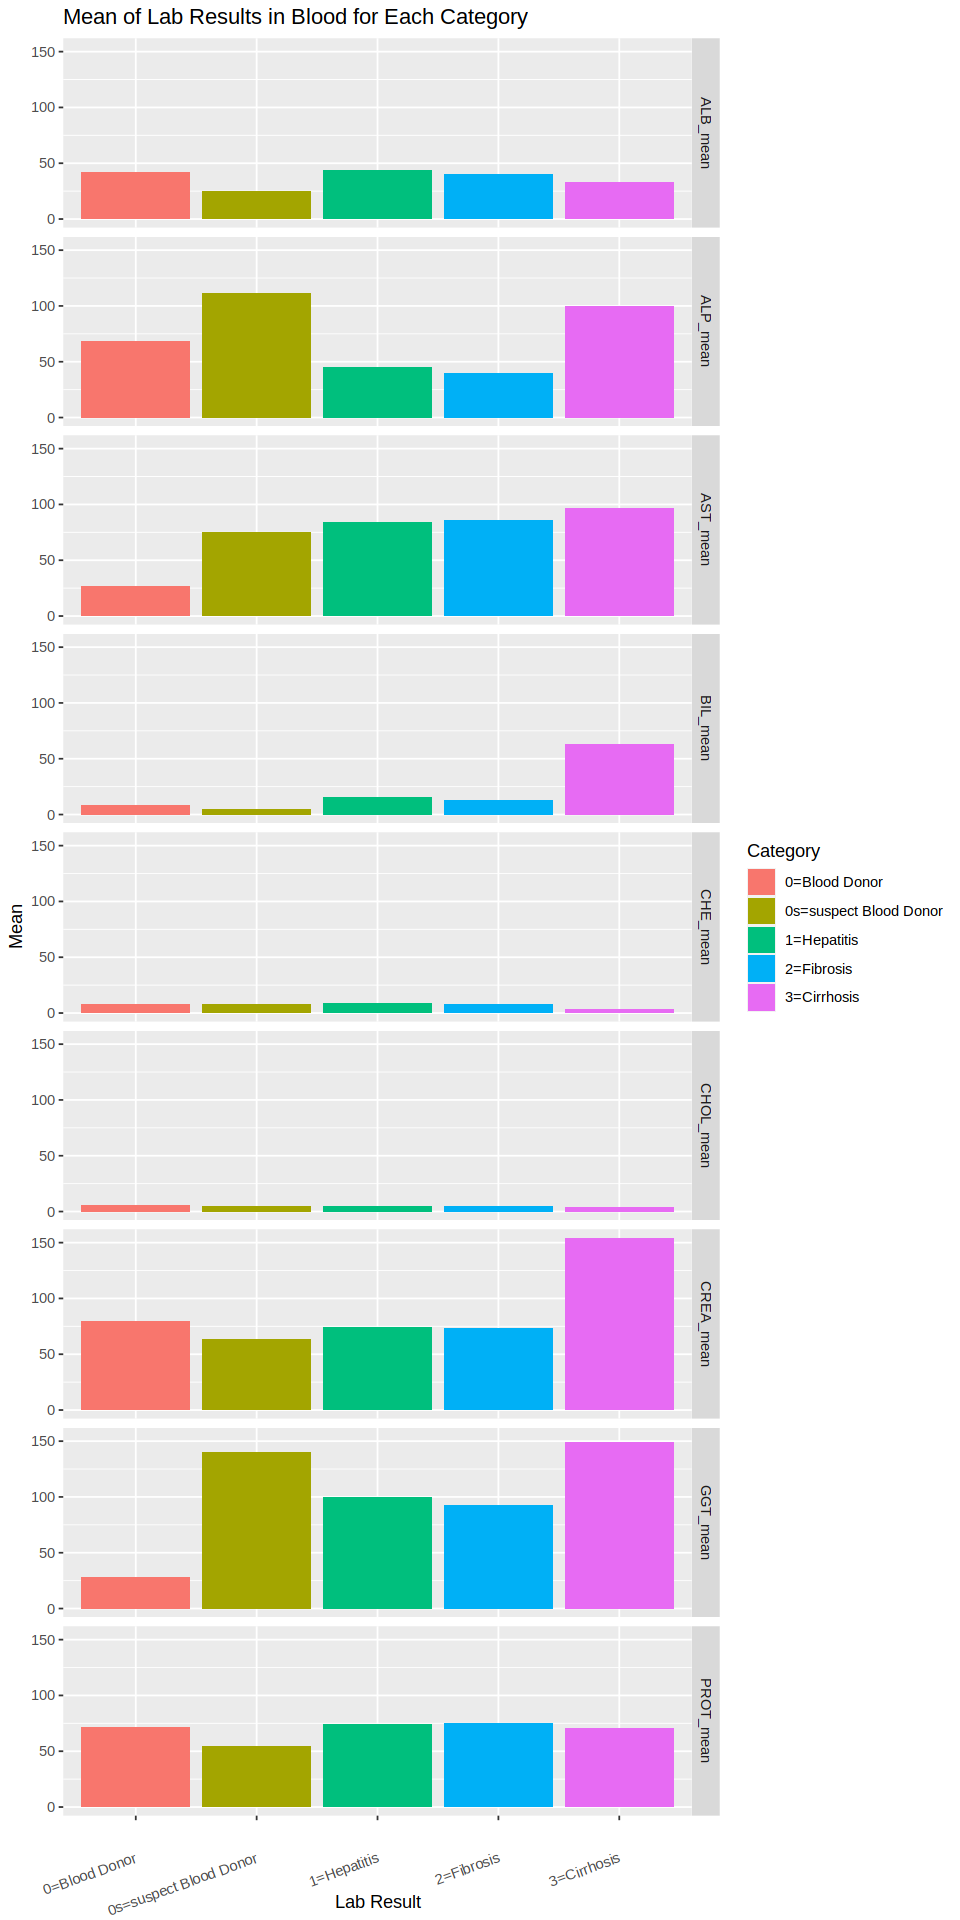

In [11]:
hcv_long <- hcv_train |>
pivot_longer(cols = ALB:PROT, names_to = "lab_result", values_to = "count") 

hcv_lab_summary_long <- hcv_lab_summary |>
pivot_longer(cols = ALB_mean:PROT_mean, names_to = "lab_result", values_to = "value") 

options(repr.plot.width = 8, repr.plot.height = 16) 
category_lab_result <- hcv_lab_summary_long |>
ggplot(aes(x = Category, y = value)) +
geom_bar(stat = "identity", aes(fill = Category, position = "dodge")) + 
    xlab("Lab Result") + 
    ylab("Mean") +
    facet_grid(rows = vars(lab_result)) +
    ggtitle("Mean of Lab Results in Blood for Each Category") +
    theme(axis.text.x = element_text(angle = 20, vjust = 0.5, hjust=1))
category_lab_result



Graph 1:
- Stacked bar plot on the mean value of each lab result for each category, visualizes the proportion of each lab result's mean to each other allowing for the determination of scale. 


Methods:

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

Expected outcomes and significance:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?